### Customer Churn Prediction Project

#### Objective:
#### This project aims to develop a machine learning model to predict whether a customer will "churn" (i.e., leave their telecommunications provider).

#### The goal is to preprocess this data, engineer features, build a machine learning model, and evaluate its performance using accuracy. We will follow several steps, including data preprocessing, feature selection, model training, and testing.

***

##### File descriptions:
* train.csv - the training set.<br>
Contains 4250 lines with 20 columns. 3652 samples (85.93%) belong to class churn=no and 598 samples (14.07%) belong to class churn=yes<br>
* test.csv - the test set.<br>
Contains 750 lines with 20 columns: the index of each sample and the 19 features (missing the target variable "churn").
sampleSubmission.csv - a sample submission file in the correct format

##### The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. 

##### Data fields:
* **state**:<br>
string. 2-letter code of the US state of customer residence
* **account_length**:<br>
numerical. Number of months the customer has been with the current telco provider
* **area_code**:<br>
string="area_code_AAA" where AAA = 3 digit area code.
* **international_plan**:<br>
(yes/no). The customer has international plan.
* **voice_mail_plan**:<br>
(yes/no). The customer has voice mail plan.
* **number_vmail_messages**:<br>
numerical. Number of voice-mail messages.
* **total_day_minutes**:<br>
numerical. Total minutes of day calls.
* **total_day_calls**:<br>
numerical. Total number of day calls.
* **total_day_charge**:<br>
numerical. Total charge of day calls.
* **total_eve_minutes**:<br>
numerical. Total minutes of evening calls.
* **total_eve_calls**:<br>
numerical. Total number of evening calls.
* **total_eve_charge**:<br>
numerical. Total charge of evening calls.
* **total_night_minutes**:<br>
numerical. Total minutes of night calls.
* **total_night_calls**:<br>
numerical. Total number of night calls.
* **total_night_charge**:<br>
numerical. Total charge of night calls.
* **total_intl_minutes**:<br>
numerical. Total minutes of international calls.
* **total_intl_calls**:<br>
numerical. Total number of international calls.
* **total_intl_charge**:<br>
numerical. Total charge of international calls
* **number_customer_service_calls**:<br>
numerical. Number of calls to customer service
* **churn**:<br>
(yes/no). Customer churn - target variable.

***

##### 1. Understanding the Problem

##### Problem Statement: Predict customer churn based on a set of customer features.
##### Target Variable: churn (yes/no).
##### Input Features: 19 different customer metrics, including usage statistics, service plan details, and account information.

***

##### 2. Data Collection and Exploration

##### Dataset: The dataset contains 4,250 samples with 19 features and a target variable churn.
##### Initial Exploration:
##### Inspect the dataset for missing values, duplicates, and summary statistics.
##### Understand the distribution of the target variable (churn).

In [231]:
# import libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [232]:
# load the datasets
train_data = pd.read_csv('./Datasets/train.csv')
test_data = pd.read_csv('./Datasets/test.csv')
submission_template = pd.read_csv('./Datasets/sampleSubmission.csv')

In [233]:
# check first 5 rows of the train_data set
train_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [234]:
# check first 5 rows of the test_data set
test_data.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [235]:
# check first 5 rows of the submission_template set
submission_template.head()

,id,churn
0,1,yes
1,2,no
2,3,no
3,4,yes
4,5,yes


##### 3. Data Preprocessing

##### Handling Missing Values: Identify and handle any missing or null values in the dataset (e.g., imputation or removal).
##### Encoding Categorical Variables: Convert categorical variables such as state, international_plan, and voice_mail_plan into numerical format using one-hot encoding or label encoding.
##### Scaling Features: Standardize or normalize numerical features to ensure equal scale (e.g., total_day_minutes, number_vmail_messages).
##### Feature Engineering: Create new features if needed, such as combining certain features that might be correlated or useful for prediction.

In [236]:
# get basic information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [237]:
# check for missing values in the train dataset
print(train_data.isnull().sum())

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


In [238]:
# check for duplicates
print(train_data.duplicated().sum())

0


In [239]:
# check unique values for columns international_plan and voice_mail_plan
print(train_data['international_plan'].unique())
print(train_data['voice_mail_plan'].unique())


['no' 'yes']
['yes' 'no']


##### Convert categorical columns to numerical columns so the model can process the data.

In [240]:
# Replace 'no' with 0 and 'yes' with 1
train_data['international_plan'] = train_data['international_plan'].replace({'no': 0, 'yes': 1})
train_data['voice_mail_plan'] = train_data['voice_mail_plan'].replace({'no': 0, 'yes': 1})
train_data['churn'] = train_data['churn'].replace({'no': 0, 'yes': 1})

# Convert the columns to integer type
train_data['international_plan'] = train_data['international_plan'].astype(int)
train_data['voice_mail_plan'] = train_data['voice_mail_plan'].astype(int)
train_data['churn'] = train_data['churn'].astype(int)

# Check the data types to confirm the conversion
print(train_data.dtypes)

state                             object
account_length                     int64
area_code                         object
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int64
dtype: object


/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_39167/2305525805.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['international_plan'] = train_data['international_plan'].replace({'no': 0, 'yes': 1})
/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_39167/2305525805.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['voice_mail_plan'] = train_data['voice_mail_plan'].replace({'no': 0, 'yes': 1})
/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_39167/2305525805.py:4: FutureWarn

##### Group by State to see Customers with International_plan and Customers with Voice_mail_plan.

In [241]:
# group customers by state
customers_by_state = train_data.groupby('state').size().reset_index(name='Count')
customers_by_state. head()

,state,Count
0,AK,61
1,AL,101
2,AR,71
3,AZ,77
4,CA,39


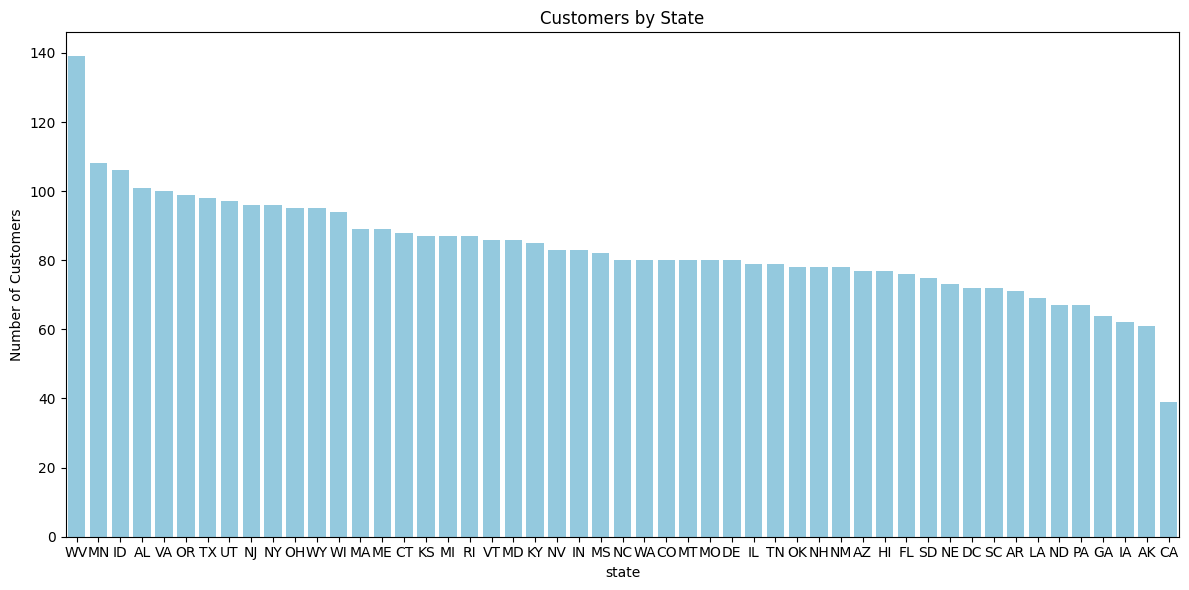

In [242]:
# sort the data in descending order by 'Count'
customers_by_state_sorted = customers_by_state.sort_values(by='Count', ascending=False)
# create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='Count', data=customers_by_state_sorted, color='skyblue')

plt.xlabel('state')
plt.ylabel('Number of Customers')
plt.title('Customers by State')
plt.tight_layout()  # adjust layout to fit labels
plt.show()

In [243]:
# calculate customers with international plan
customers_by_international_plan = train_data.groupby('international_plan').size().reset_index(name='Count')
customers_by_international_plan

,international_plan,Count
0,0,3854
1,1,396


In [244]:
# calculate customers with voice mail plan
customers_by_voice_mail_plan = train_data.groupby('voice_mail_plan').size().reset_index(name='Count')
customers_by_voice_mail_plan

,voice_mail_plan,Count
0,0,3138
1,1,1112


##### Comparison of International and Voice Mail Plans

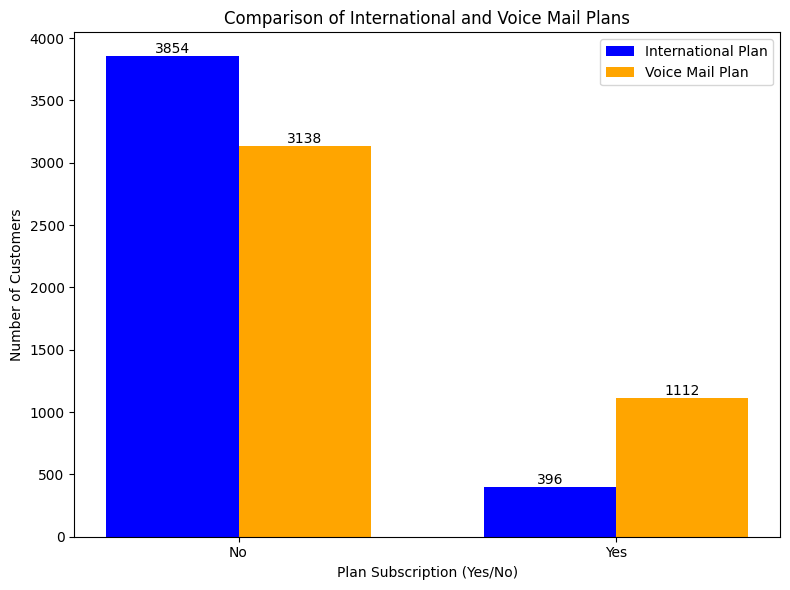

In [245]:
# Function to aggregate counts by a given column
def get_plan_counts(data, plan_column):
    """
    Aggregates the count of customers grouped by the given plan column.
    
    Args:
    - data (pd.DataFrame): The dataset containing the plan column.
    - plan_column (str): The column name for the plan to be grouped by.
    
    Returns:
    - list: A list of counts [No, Yes] for the given plan.
    """
    counts = data.groupby(plan_column).size().reset_index(name='Count')
    # Convert 'No' and 'Yes' into ordered list format
    return counts.sort_values(plan_column)['Count'].tolist()

# Function to create a combined bar plot
def plot_combined_plan_counts(data, international_col, voicemail_col):
    """
    Plots a combined bar chart for two plans grouped by 'Yes' and 'No'.
    
    Args:
    - data (pd.DataFrame): The dataset containing the plans.
    - international_col (str): The column name for the international plan.
    - voicemail_col (str): The column name for the voice mail plan.
    """
    # Get counts for both plans
    international_counts = get_plan_counts(data, international_col)
    voicemail_counts = get_plan_counts(data, voicemail_col)

    # Labels and positions
    labels = ['No', 'Yes']
    x = np.arange(len(labels))
    bar_width = 0.35

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    bars1 = ax.bar(x - bar_width / 2, international_counts, bar_width, label='International Plan', color='blue')
    bars2 = ax.bar(x + bar_width / 2, voicemail_counts, bar_width, label='Voice Mail Plan', color='orange')

    # Add labels, title, and legend
    ax.set_xlabel('Plan Subscription (Yes/No)')
    ax.set_ylabel('Number of Customers')
    ax.set_title('Comparison of International and Voice Mail Plans')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # Annotate counts on bars
    for bar in bars1:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
    for bar in bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Plot combined plan counts
plot_combined_plan_counts(train_data, 'international_plan', 'voice_mail_plan')

##### Comparison by Plan for each State

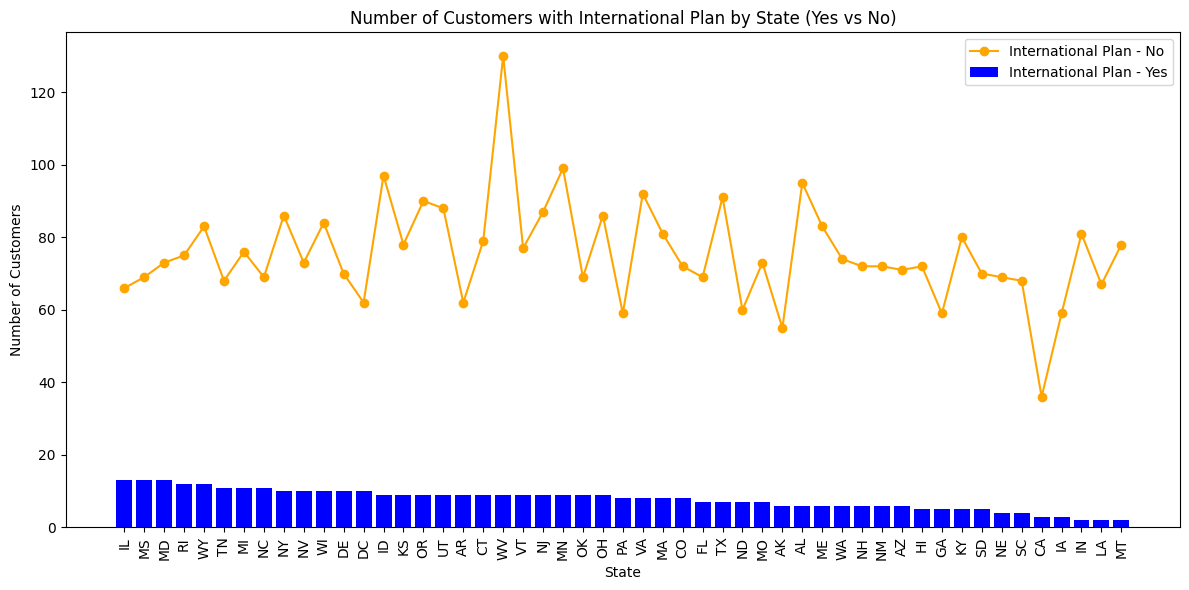

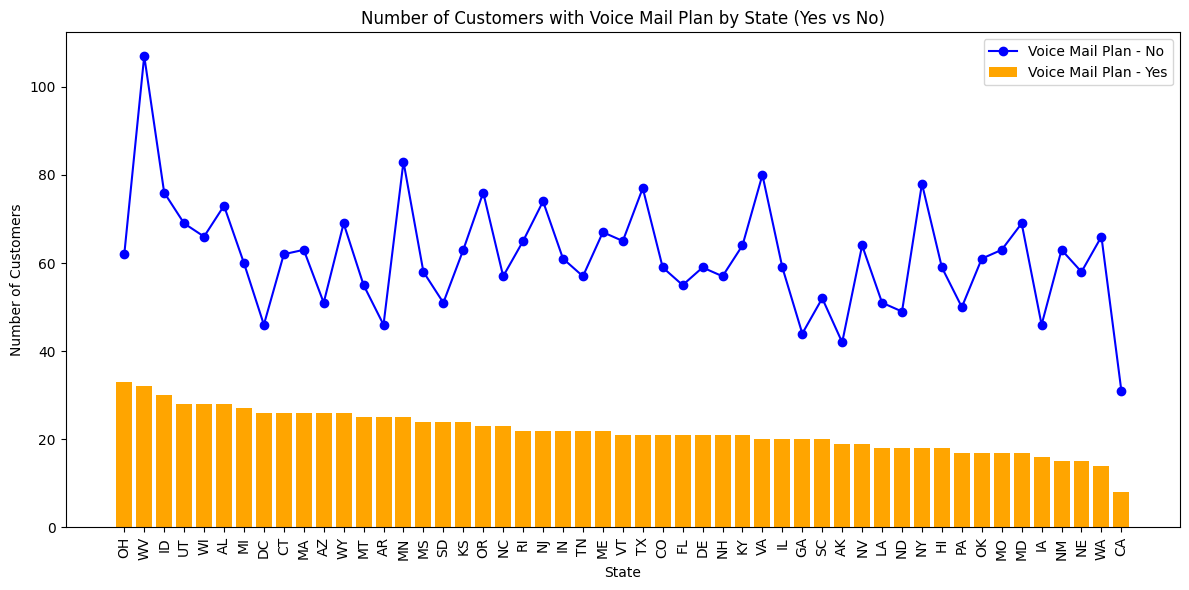

In [246]:
# Function to filter and count customers with a specific plan by state
def get_state_counts(data, plan_column, value):
    """
    Filters the dataset for the specified value in the given plan column
    and aggregates counts by state, sorted in descending order.
    
    Args:
    - data (pd.DataFrame): The dataset containing the plan column and state column.
    - plan_column (str): The column name for the plan to filter by.
    - value (int): The value to filter the plan column by (1 for Yes, 0 for No).
    
    Returns:
    - pd.DataFrame: A DataFrame with states and their respective counts, sorted in descending order.
    """
    filtered_data = data[data[plan_column] == value]  # Keep only rows where the plan value matches
    state_counts = (
        filtered_data.groupby('state').size()
        .reset_index(name='Count')
        .sort_values(by='Count', ascending=False)  # Sort by count in descending order
    )
    return state_counts

# Function to create a combined bar and line plot
def plot_state_counts_with_line(data, plan_column, bar_color, line_color, plan_name):
    """
    Creates a combined bar and line plot for a plan by state.
    The bars represent 'Yes' (value 1), and the line represents 'No' (value 0).
    
    Args:
    - data (pd.DataFrame): The dataset containing the plan column and state column.
    - plan_column (str): The column name for the plan to plot.
    - bar_color (str): The color of the bars for the 'Yes' counts.
    - line_color (str): The color of the line for the 'No' counts.
    - plan_name (str): The name of the plan for the plot title and legend.
    """
    # Get counts for Yes (1) and No (0)
    yes_counts = get_state_counts(data, plan_column, 1)
    no_counts = get_state_counts(data, plan_column, 0)

    # Merge to align Yes and No counts by state
    combined_counts = pd.merge(yes_counts, no_counts, on='state', how='outer', suffixes=('_yes', '_no')).fillna(0)
    combined_counts = combined_counts.sort_values(by='Count_yes', ascending=False)  # Sort by Yes counts

    # Plot
    plt.figure(figsize=(12, 6))
    
    # Bar plot for Yes counts
    plt.bar(combined_counts['state'], combined_counts['Count_yes'], color=bar_color, label=f'{plan_name} - Yes')
    
    # Line plot for No counts
    plt.plot(combined_counts['state'], combined_counts['Count_no'], color=line_color, label=f'{plan_name} - No', marker='o')

    # Add labels, title, and legend
    plt.xlabel('State')
    plt.ylabel('Number of Customers')
    plt.title(f'Number of Customers with {plan_name} by State (Yes vs No)')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot for International Plan
plot_state_counts_with_line(
    train_data,
    'international_plan',
    bar_color='blue',
    line_color='orange',
    plan_name='International Plan'
)

# Plot for Voice Mail Plan
plot_state_counts_with_line(
    train_data,
    'voice_mail_plan',
    bar_color='orange',
    line_color='blue',
    plan_name='Voice Mail Plan'
)

##### Statistics of total minutes, total calls and total charge for each period of the day and international

In [247]:
#statistics for day minutes
train_data['total_day_minutes'].describe()

count    4250.000000
mean      180.259600
std        54.012373
min         0.000000
25%       143.325000
50%       180.450000
75%       216.200000
max       351.500000
Name: total_day_minutes, dtype: float64

In [248]:
# statistics for day calls
train_data['total_day_calls'].describe()

count    4250.000000
mean       99.907294
std        19.850817
min         0.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       165.000000
Name: total_day_calls, dtype: float64

In [249]:
# statistics for day charge
train_data['total_day_charge'].describe()

count    4250.000000
mean       30.644682
std         9.182096
min         0.000000
25%        24.365000
50%        30.680000
75%        36.750000
max        59.760000
Name: total_day_charge, dtype: float64

In [250]:
# statistics for evening minutes
train_data['total_eve_minutes'].describe()

count    4250.000000
mean      200.173906
std        50.249518
min         0.000000
25%       165.925000
50%       200.700000
75%       233.775000
max       359.300000
Name: total_eve_minutes, dtype: float64

In [251]:
# statistics for evening calls
train_data['total_eve_calls'].describe()

count    4250.000000
mean      100.176471
std        19.908591
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: total_eve_calls, dtype: float64

In [252]:
# statistics for evening charge
train_data['total_eve_charge'].describe()

count    4250.000000
mean       17.015012
std         4.271212
min         0.000000
25%        14.102500
50%        17.060000
75%        19.867500
max        30.540000
Name: total_eve_charge, dtype: float64

In [253]:
# statistics for night minutes
train_data['total_night_minutes'].describe()

count    4250.000000
mean      200.527882
std        50.353548
min         0.000000
25%       167.225000
50%       200.450000
75%       234.700000
max       395.000000
Name: total_night_minutes, dtype: float64

In [254]:
# statistics for night calls
train_data['total_night_calls'].describe()

count    4250.000000
mean       99.839529
std        20.093220
min         0.000000
25%        86.000000
50%       100.000000
75%       113.000000
max       175.000000
Name: total_night_calls, dtype: float64

In [255]:
# statistis for night charge
train_data['total_night_charge'].describe()

count    4250.000000
mean        9.023892
std         2.265922
min         0.000000
25%         7.522500
50%         9.020000
75%        10.560000
max        17.770000
Name: total_night_charge, dtype: float64

In [256]:
# statistics for international minutes
train_data['total_intl_minutes'].describe()

count    4250.000000
mean       10.256071
std         2.760102
min         0.000000
25%         8.500000
50%        10.300000
75%        12.000000
max        20.000000
Name: total_intl_minutes, dtype: float64

In [257]:
# statistics for total international calls
train_data['total_intl_calls'].describe()

count    4250.000000
mean        4.426353
std         2.463069
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: total_intl_calls, dtype: float64

In [258]:
# statistics for international charge
train_data['total_intl_charge'].describe()

count    4250.000000
mean        2.769654
std         0.745204
min         0.000000
25%         2.300000
50%         2.780000
75%         3.240000
max         5.400000
Name: total_intl_charge, dtype: float64

***

In [259]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [260]:
submission_template.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      750 non-null    int64 
 1   churn   750 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


##### 4. Splitting the Data

##### Training and Testing Split: Split the dataset into training and testing sets. Typically, a 70-30 or 80-20 split is used (70-80% for training, 20-30% for testing).
##### Cross-Validation: Optionally, perform k-fold cross-validation to ensure the model generalizes well.

##### 5. Model Selection

##### Choose a machine learning model to predict customer churn. Some possible algorithms include:
##### Logistic Regression: Good baseline for binary classification problems.
##### Decision Trees: Intuitive model, can handle non-linear relationships.
##### Random Forest: An ensemble method that builds multiple decision trees and combines their results.
##### Support Vector Machines (SVM): Effective for high-dimensional datasets and binary classification.
##### Gradient Boosting Machines (GBM): Powerful ensemble technique that can be highly effective for classification tasks.

##### 6. Model Training

##### Training the Model: Train the selected model on the training data.
##### Hyperparameter Tuning: Use techniques like GridSearchCV or RandomizedSearchCV to optimize the model’s hyperparameters (e.g., learning rate, depth of decision trees).
##### Feature Selection: Optionally, perform feature selection to identify the most important features that contribute to predicting churn.


##### 7. Model Evaluation

##### Performance Metrics: Evaluate the model using accuracy, precision, recall, F1-score, and confusion matrix. Given that the target is binary (yes/no for churn), accuracy will be the primary evaluation metric.
##### Overfitting and Underfitting: Check for overfitting (model performs well on training data but poorly on test data) and underfitting (model performs poorly on both).
##### Cross-Validation Results: If cross-validation was used, check the performance across different folds.

##### 8. Model Optimization

##### Tuning: Adjust hyperparameters, possibly using techniques like cross-validation, and optimize the model’s performance.
##### Ensemble Methods: Try combining different models (e.g., Random Forest + Gradient Boosting) to boost performance if necessary.


##### 9. Making Predictions

##### Testing the Model: Once the model has been optimized, use it to make predictions on the test dataset.
##### Output the Results: Generate the final predictions and save them to a file for submission or evaluation.